# Tutorial 3: Introducción a Pandas y Clasificación usando Python

**Fecha:**

**Objetivo:** El objetivo de este tutorial es relacionarse con el paquete Pandas y las bibliotecas necesarias para entrenar clasificadores usando Python.


# Herramientas

### Anaconda
Una forma fácil de tener un ambiente de Python **local** con las bibliotecas más comunes es instalando *Anaconda*. Para esto:

- Descarga en el siguiente link la última versión de Python: https://www.python.org/downloads/
- Descarga en el siguiente link la última versión de Anaconda: https://www.anaconda.com/distribution/
- Puedes probar tu instalación ejecutando `python` en un terminal `Anaconda Prompt` y verificar que diga algo como `Python 3.7.6 |Anaconda 4.9.0` al principio. Opcionalmente, si quieres ejecutar las herramientas de anaconda desde la terminal del sistema, asegúrate de dejar en el PATH el directorio `bin` de anaconda (Guía en windows, *Add Anaconda to Path (Optional)* https://www.datacamp.com/community/tutorials/installing-anaconda-windows).

**Instalación de Bibliotecas:**
Anaconda facilita mucho la instalación de las bibliotecas que usaremos en este laboratorio. Instalar las bibliotecas (`scikit-learn`, `jupyter`) desde cero puede ser un poco complicado. Por lo tanto, instalar Anaconda es altamente recomendado para estas sesiones de laboratorio.

1. Abrir aplicación Anaconda prompt.
2. Ejecutar comando: conda install *biblioteca*

Para este tutorial instalar las bibliotecas: *numpy*, *scikit-learn*, *pandas*, *matplotlib*, *seaborn*

### Jupyter

**Jupyter notebook** (viene con anaconda) es una aplicación web que permite crear documentos con código Python, similar a los R Notebooks o R Markdown. Para este tutorial y los laboratorios 2.1 y 2.2 usaremos un **notebook** donde deberán completar sus respuestas en el mismo archivo.

Para cargar y editar un archivo.ipynb deben abrir la terminal y ejecutar `jupyter notebook`. Esto abrirá el navegador donde pueden buscar el archivo .ipynb dentro del directorio. TIP: con Shift-Enter pueden ejecutar cada bloque del notebook.


El archivo en formato **HTML** se puede descargar ejecutando el siguiente comando desde la consola de anaconda:

`jupyter nbconvert nombre_archivo.ipynb --to html`

Otra opción más sencilla es descargarlo desde el mismo notebook, haciendo clic en:
*File -> Download as-> HTML (.html)*

### Celda de verificación

Ejecute esta celda para verificar que las bibliotecas fueron instaladas correctamente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import cross_val_score
from sklearn import metrics, model_selection

from sklearn.datasets import load_breast_cancer
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # Naive bayes
from sklearn.neighbors import KNeighborsClassifier


print("Si muestra este mensaje es porque la carga de las librerías anteriores está ok!")

Si muestra este mensaje es porque la carga de las librerías anteriores está ok!


### Scikit-learn

Hay muchas bibliotecas para hacer análisis de datos. Para este tutorial vamos a usar **scikit-learn** (http://scikit-learn.org) que contiene muchos modelos de machine learning ya instalados.

**OJO**: Si ya instalaste *Anaconda*, no necesitas instalar nada dado que viene en el pack.

## Google Colab

Aunque usaremos un notebook local (porque es importante que se familiaricen con anaconda), deben conocer <a href="https://colab.research.google.com/notebooks/welcome.ipynb?hl=es_US">Colaboratory</a>, también llamado "Colab", que esencialmente es un jupyter notebook con las siguientes ventajas:
- No requiere configuración
- Da acceso gratuito a GPUs
- Permite compartir contenido fácilmente

# Introducción a Pandas


Pandas es una herramienta de manipulación y análisis de datos de código abierto rápida, potente, flexible y fácil de usar [<https://pandas.pydata.org/>]. Este paquete de Python proporciona estructuras de datos similares a los dataframes de R (tablas con filas de observaciones y columnas de variables).

Pandas proporciona mecanismos eficientes para trabajar con diferentes formatos de datos como archivos CSV (del inglés comma-separated values), archivos de Excel o bases de datos.

Las dos estructuras de datos principales de Pandas son: **Series** (Matriz unidimensional etiquetada de forma homogénea) y **DataFrame** (Estructura de datos bidimensional con columnas que pueden contener diferentes tipos de datos). Podríamos pensar en las estructuras de datos de Pandas como contenedores flexibles para datos de dimensiones inferiores. Por ejemplo, DataFrame es un contenedor para Series y Series es un contenedor para escalares [<https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html>].

![alt text](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)
Source:https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/

## Crear dataframes y cargar datos

In [ ]:
#standard import form used
import pandas as pd
import numpy as np

Cuando desee utilizar Pandas para el análisis de datos, normalmente lo utilizará de tres formas diferentes:

* Convertir una lista, diccionario o matriz Numpy en un dataframe de Pandas.
* Abrir un archivo local usando Pandas, generalmente un archivo CSV, pero también podría ser un archivo de texto delimitado (como TSV), Excel, etc.
* Abrir un archivo o base de datos remota como un CSV o JSON en un sitio web a través de una URL o desde una tabla / base de datos SQL.

In [ ]:
#In order to convert a certain Python object (dictionary, lists, etc) the basic command is:
pd.DataFrame()

""


In [ ]:
#From dict
df = pd.DataFrame({
    'col1': ['Item0', 'Item0', 'Item1', 'Item1'],
    'col2': ['NLP', 'DL', 'ML', 'WEB'],
    'col3': [1, 2, np.nan, 4] #np.nan representa valor nulo
})

df

,col1,col2,col3
0,Item0,NLP,1.0
1,Item0,DL,2.0
2,Item1,ML,NaN
3,Item1,WEB,4.0


In [ ]:
#From list
l = [['Item0', 'NLP', 1],
     ['Item0', 'DL', 2],
     ["Item1", "ML", np.nan],
     ["Item1", "WEB", 4]
     ]

df2 = pd.DataFrame(l, columns=['col1', 'col2', 'col3'])
df2

,col1,col2,col3
0,Item0,NLP,1.0
1,Item0,DL,2.0
2,Item1,ML,NaN
3,Item1,WEB,4.0


In [ ]:
#Reading data as dataframe from .csv
#By default the delimiter or separator is comma. When data has another delimiter, you must define it (for example: sep='\t')

mtcars_df = pd.read_csv("https://raw.githubusercontent.com/giturra/tutorial2/main/mtcars.csv")

Ejecutando `help(pd.read_csv)` pueden ver la documentación del objeto.

## Explorar datos

Una vez cargados los datos, es momento de revisar nuestro dataframe.
Ejecutar el nombre del dataframe le proporciona la tabla completa, pero también puede obtener información específica usando comandos como los siguientes.

In [ ]:
# Displays the first 5 rows. You can define the first 'n' rows to show, for example: df.head(n)
mtcars_df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# Similar to head, but displays the last rows
mtcars_df.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [ ]:
# The dimensions of the dataframe as a (rows, cols) tuple
mtcars_df.shape

(32, 12)

In [ ]:
# The number of rows. Equal to df.shape[0]
len(mtcars_df)

32

In [ ]:
# An object with the column names
mtcars_df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [ ]:
# You can rename (specific) columns using its names (for example: "model" or mtcars_df.columns[0])
# Also can be renamed by its index

mtcars_df = mtcars_df.rename(columns={
    'model': 'Model', 'mpg':'MPG', 'cyl':'CYL',
    'disp': 'DISP', 'hp': 'HP', 'drat': 'DRAT',
    'wt': 'WT', 'qsec': 'QSEC', 'vs': 'VS',
    'am': 'AM','gear': 'GEAR', 'carb': 'CARB'})


#Also you can do it modifying the data frame, but is necessary write all cols names (in order)
mtcars_df.columns = ['Model', 'MPG', 'CYL', 'DISP', 'HP', 'DRAT', 'WT', 'QSEC', 'VS', 'AM','GEAR', 'CARB']

mtcars_df.head(2)

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [ ]:
# Unique values from a column
mtcars_df.Model.unique()

array(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D',
       'Merc 230', 'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL',
       'Merc 450SLC', 'Cadillac Fleetwood', 'Lincoln Continental',
       'Chrysler Imperial', 'Fiat 128', 'Honda Civic', 'Toyota Corolla',
       'Toyota Corona', 'Dodge Challenger', 'AMC Javelin', 'Camaro Z28',
       'Pontiac Firebird', 'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa',
       'Ford Pantera L', 'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype=object)

In [ ]:
# Columns and their types
mtcars_df.dtypes

Model     object
MPG      float64
CYL        int64
DISP     float64
HP         int64
DRAT     float64
WT       float64
QSEC     float64
VS         int64
AM         int64
GEAR       int64
CARB       int64
dtype: object

In [ ]:
# Prints information about index dtype and column dtypes, non-null values and memory usage.
mtcars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   32 non-null     object 
 1   MPG     32 non-null     float64
 2   CYL     32 non-null     int64  
 3   DISP    32 non-null     float64
 4   HP      32 non-null     int64  
 5   DRAT    32 non-null     float64
 6   WT      32 non-null     float64
 7   QSEC    32 non-null     float64
 8   VS      32 non-null     int64  
 9   AM      32 non-null     int64  
 10  GEAR    32 non-null     int64  
 11  CARB    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [ ]:
# Displays descriptive stats for all columns
mtcars_df.describe()

,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [ ]:
#Allows you to count nan values by columns
mtcars_df.isna().sum()

Model    0
MPG      0
CYL      0
DISP     0
HP       0
DRAT     0
WT       0
QSEC     0
VS       0
AM       0
GEAR     0
CARB     0
dtype: int64

In [ ]:
# would allow you to view unique values and counts for a series (like a column or a few columns).
mtcars_df['AM'].value_counts(dropna=False)

0    19
1    13
Name: AM, dtype: int64

También es posible obtener estadísticas sobre todo el dataframe o una serie (una columna, etc.):

*   *df.mean()* Returns the mean of all columns
*   *df.corr()* Returns the correlation between columns in a data frame
*   *df.count()* Returns the number of non-null values in each data frame column
*   *df.max()* Returns the highest value in each column
*   *df.min()* Returns the lowest value in each column
*   *df.median()* Returns the median of each column
*   *df.std()* Returns the standard deviation of each column

In [ ]:
# Converts the frame to a two-dimensional table
# we use [0:5] for printing only the first 5 examples
mtcars_df.values[0:5]

array([['Mazda RX4', 21.0, 6, 160.0, 110, 3.9, 2.62, 16.46, 0, 1, 4, 4],
       ['Mazda RX4 Wag', 21.0, 6, 160.0, 110, 3.9, 2.875, 17.02, 0, 1, 4,
        4],
       ['Datsun 710', 22.8, 4, 108.0, 93, 3.85, 2.32, 18.61, 1, 1, 4, 1],
       ['Hornet 4 Drive', 21.4, 6, 258.0, 110, 3.08, 3.215, 19.44, 1, 0,
        3, 1],
       ['Hornet Sportabout', 18.7, 8, 360.0, 175, 3.15, 3.44, 17.02, 0,
        0, 3, 2]], dtype=object)

## Manipular datos

In [ ]:
#let's use this small sampled set of mtcars data to better observe data manipulation
mtcars_df_sampled = mtcars_df.sample(n=5, random_state=50).reset_index(drop=True)
mtcars_df_sampled

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
0,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
1,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
3,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


### Sorting
El método sort_index se utiliza para ordenar el dataframe por filas o columnas.

axis=0 identifica las filas y axis=1 identifica las columnas.

In [ ]:
# Sort rows descendingly by the index
mtcars_df_sampled.sort_index(axis=0, ascending=False)

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
3,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
1,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
0,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2


We can also sort by one or multiple columns:


In [ ]:
mtcars_df_sampled.sort_values(by=['Model', 'AM'], ascending=True)

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
0,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
1,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
3,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


### Seleccionar / Consultar
Las columnas individuales se pueden seleccionar con el operador [] o directamente como atributos:

In [ ]:
# Selects only the column named 'Model';
mtcars_df_sampled.Model

# Return the same as previous
mtcars_df_sampled['AM']

0    1
1    0
2    1
3    0
4    1
Name: AM, dtype: int64

In [ ]:
# Select two columns
mtcars_df_sampled[['Model', 'AM']]

,Model,AM
0,Honda Civic,1
1,Merc 230,0
2,Maserati Bora,1
3,Merc 280,0
4,Toyota Corolla,1


In [ ]:
# Same as previous (select all rows for columns with indexes 0 and 4)
# [:, ] indicates selection of all rows
mtcars_df_sampled.iloc[:, [0, 4]]

,Model,HP
0,Honda Civic,52
1,Merc 230,95
2,Maserati Bora,335
3,Merc 280,123
4,Toyota Corolla,65


También puede seleccionar por coordenadas/posición. Los índices se basan en cero:

In [ ]:
# Selects first row
mtcars_df_sampled.iloc[0]

Model    Honda Civic
MPG             30.4
CYL                4
DISP            75.7
HP                52
DRAT            4.93
WT             1.615
QSEC           18.52
VS                 1
AM                 1
GEAR               4
CARB               2
Name: 0, dtype: object

In [ ]:
# Selects rows 1-to-3 (exclusive)
mtcars_df_sampled.iloc[1:3]

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
1,Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2
2,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [ ]:
# Value of first row and first column
mtcars_df_sampled.iloc[0,0]

'Honda Civic'

In [ ]:
# First 4 rows and first 2 columns
mtcars_df_sampled.iloc[0:4, 0:2]

,Model,MPG
0,Honda Civic,30.4
1,Merc 230,22.8
2,Maserati Bora,15.0
3,Merc 280,19.2


La mayoría de las veces, necesitamos seleccionar por una condición en los valores de la celda. Para hacerlo, proporcionamos una matriz booleana que indica qué filas se seleccionarán. El truco es que pandas predefine muchos operadores booleanos para sus dataframes y series. Por ejemplo, la siguiente expresión produce una matriz booleana:

In [ ]:
# Produces and array, not a single value!
mtcars_df_sampled.AM > 0.2

0     True
1    False
2     True
3    False
4     True
Name: AM, dtype: bool

Esto nos permite escribir consultas (o filtros) como éstas:

In [ ]:
# Query by a single column value
mtcars_df_sampled[mtcars_df_sampled.AM > 0.2]

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
0,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


In [ ]:
# Query by a single column, if it is in a list of predefined values
mtcars_df_sampled[mtcars_df_sampled['Model'].isin(['Honda Civic', 'Toyota Corolla'])]

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
0,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


In [ ]:
# A conjunction query using two columns
mtcars_df_sampled[(mtcars_df_sampled['AM'] > 0.2) & (mtcars_df_sampled['CARB'] > 0.3)]

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
0,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


In [ ]:
# A disjunction query using two columns
mtcars_df_sampled[(mtcars_df_sampled['AM'] > 0.2) | (mtcars_df_sampled['CARB'] > 0.3)]

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
0,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
1,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
3,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


In [ ]:
# A query checking the textual content of the cells
mtcars_df_sampled[mtcars_df_sampled.Model.str.contains('Toyota')]

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


### Modificación de Dataframes

Las operaciones de Pandas tienden a producir nuevos dataframes en lugar de modificar los proporcionados. Muchas operaciones tienen el parámetro `inplace` booleano opcional que podemos usar para forzar a Pandas a aplicar los cambios al dataframe en cuestión.

También es posible asignar directamente los valores en celdas, columnas y selecciones de la siguiente manera:

In [ ]:
# Modifies the cell identified by its row index and column name (using df.at)
mtcars_df_sampled.at[0, 'Model'] = 'New Model'
mtcars_df_sampled

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
0,New Model,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
1,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
3,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


In [ ]:
# Modifies the cell identified by its absolute row and column indices
mtcars_df_sampled.iat[0, 0] = 'New Model2'
mtcars_df_sampled

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB
0,New Model2,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
1,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
3,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1


In [ ]:
# Creates or Replaces a column with a numpy array or a simple list.
mtcars_df_sampled.loc[:,'origin'] = ['Unknown'] * len(mtcars_df_sampled)
mtcars_df_sampled

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB,origin
0,New Model2,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,Unknown
1,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Unknown
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,Unknown
3,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Unknown
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,Unknown


In [ ]:
# Equivalent to the previous
mtcars_df_sampled['origin'] = ['Unk'] * len(mtcars_df_sampled)
mtcars_df_sampled

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB,origin
0,New Model2,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,Unk
1,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Unk
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,Unk
3,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Unk
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,Unk


In [ ]:
# Removes all rows with any missing values
mtcars_df_sampled.dropna(how='any')

# Removes all rows with all missing values
mtcars_df_sampled.dropna(how='all')

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB,origin
0,New Model2,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,Unk
1,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Unk
2,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,Unk
3,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Unk
4,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,Unk


A menudo es útil crear nuevas columnas basadas en las existentes utilizando una función. Las nuevas columnas a menudo se denominan características derivadas:

In [ ]:
def f(x):
    return x + ' New Column'

# Uses the unary function f to create a new column based on an existing one
mtcars_df_sampled['Model'] = f(mtcars_df_sampled.Model)
mtcars_df_sampled

,Model,MPG,CYL,DISP,HP,DRAT,WT,QSEC,VS,AM,GEAR,CARB,origin
0,New Model2 New Column,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2,Unk
1,Merc 230 New Column,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Unk
2,Maserati Bora New Column,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,Unk
3,Merc 280 New Column,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,Unk
4,Toyota Corolla New Column,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1,Unk


## Guardar/exportar dataframes como .csv

In [ ]:
mtcars_df_sampled.to_csv('mtcars_df_sampled.csv', index=False)

## Visualizar datos

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [ ]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/giturra/tutorial2/main/iris.csv')

In [ ]:
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

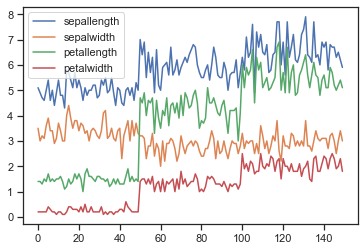

In [ ]:
#In this plot we can see a separation between the classes
iris_df.plot()

<AxesSubplot:>

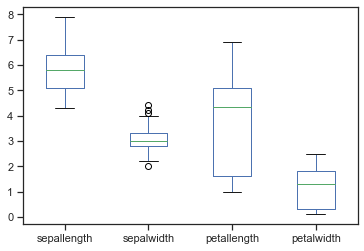

In [ ]:
#Box plot of each column
iris_df.plot(kind='box')

In [ ]:
plt.style.use('ggplot')


print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:>

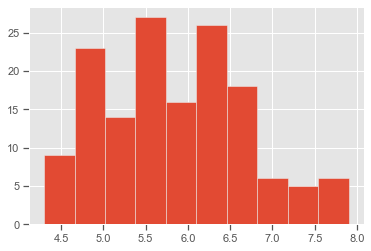

In [ ]:
#Histogram of one column
iris_df['sepallength'].hist()

In [ ]:
# We separate the predictor variables and the target values
# The target column 'variety' is aggregated as a new column 'y' with encoded labels
print(iris_df["class"])

X = pd.DataFrame(iris_df[["sepallength","sepalwidth","petallength","petalwidth"]])
y = list(iris_df["class"])

le = preprocessing.LabelEncoder() #Encode target labels with value between 0 and n_classes-1.
y = le.fit_transform(y)

iris_df["y"] = y

print(iris_df["y"])

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: y, Length: 150, dtype: int64


In [ ]:
# 'y' corresponds to 0=Setosa, 1=Versicolor,2=Virginica)
iris_df.groupby(['y', 'class']).count()

,,sepallength,sepalwidth,petallength,petalwidth
y,class,,,,
0,Iris-setosa,50,50,50,50
1,Iris-versicolor,50,50,50,50
2,Iris-virginica,50,50,50,50


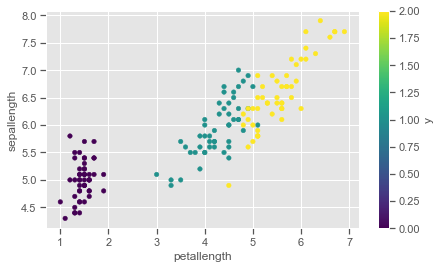

In [ ]:
#Plotting classes by two columns using pandas.DataFrame.plot
#iris_df.plot.scatter(x="sepal_length", y="sepal_width", c="y", colormap='viridis');

fig, ax = plt.subplots(figsize=(7, 4))
iris_df.plot(kind='scatter', x="petallength", y="sepallength", c="y", colormap='viridis', ax=ax);

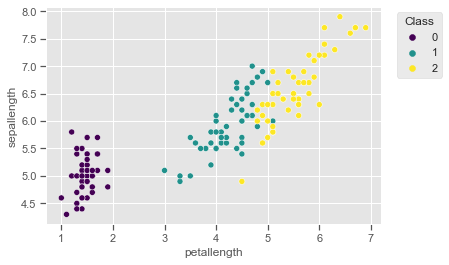

In [ ]:
#Plotting classes by two columns using seaborn.scatterplot
sns.scatterplot(x="petallength", y="sepallength", data=iris_df, hue="y", palette='viridis').legend(
    title='Class', bbox_to_anchor=(1.2, 1));

# Clasificación usando Python

## Ejemplo: Iris Dataset

Vamos a ocupar el dataset **iris** disponible en sklearn, que como hemos visto contiene 150 **instancias** (filas) de 3 **clases** diferentes de flores. El método **load_iris** permite cargar el dataset.

In [ ]:
#Para cargar las bibliotecas, haz click en el siguiente bloque de código, y ejecútalo presionando `Shift+Enter`:
from sklearn.datasets import load_iris

print("Si se muestra esto es porque ya está instalado!")

Si se muestra esto es porque ya está instalado!


In [ ]:
iris = load_iris()

X = iris.data      ## datos, caracteristicas o features de cada flor.

y = iris.target    ## clase para cada instancia anterior.

print("X:\n", X[:10])   # muestra las primeras 10 filas que corresponden a las caracteristicas de 10 flores.
print("y:\n", y[:10])   # muestra las primeras 10 clases para cada una de las instancias de X

X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y:
 [0 0 0 0 0 0 0 0 0 0]


Podemos saber los nombres de los *features* (columnas) usando el campo **feature_names**:

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Para saber cuáles son las clases:

In [ ]:
print(iris.target)  # mostramos todas las clases de X

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**0 Corresponde a setosa;
1 Corresponde a versicolor;
2 Corresponde a virginica**


Podemos verificar esto haciendo.

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
type(iris.data)

numpy.ndarray

En resumen, lo que tenemos es la descripción de una flor (medidas) en una fila, acompañada con la clase. Por ejemplo, para la segunda fila, tenemos:

**4.9,  3. ,  1.4,  0.2**  y la clase asociada es **0 (setosa)**

In [ ]:
print(iris.data[1], iris.target[1])

[4.9 3.  1.4 0.2] 0


Podemos obtener una descripción más completa usando:

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Lo que haremos a continuación será entrenar un clasificador y predecir con nuevos datos.

## Nuestro primer clasificador

Entrenaremos nuestro primer clasificador con *Iris dataset*.
Para esto, usaremos un árbol de decisión.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X, y)   ## Entrenar usando X (features), y (clase)

DecisionTreeClassifier()

Con el método **fit** entrenamos el clasificador con los datos de <b>X</b> y la clase asociada a cada uno, **y**. Para ver qué tan bien fue el entrenamiento, podemos evaluar el clasificador ejecutándolo sobre instancias y verificando que la clase sea la correcta.

Ya hemos entrenado nuestro clasificador empleando **fit**. Luego para predecir, usamos **predict**.

In [ ]:
y_pred = clf.predict(X)   ## predecir 'y' usando la matriz 'X'
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Por ejemplo, si ejecutáramos ```clf.predict([[5.1, 3.5, 1.4, 0.2]])```, le estamos pasando al clasificador un dato con valores **[5.1, 3.5, 1.4, 0.2]**. Al ejecutar **predict**, éste nos retornará un arreglo con el valor <b>0</b>, indicando que esos datos fueron clasificados como la clase **0 (setosa)**.

En **scikit-learn** existe el método **accuracy_score** que computa el Accuracy de la clasificación:

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


Como se puede apreciar, tuvimos un accuracy del 100% con el clasificador (1.0). Sin embargo, **hicimos algo incorrecto**: evaluamos el clasificador con los mismos datos con los cuales lo entrenamos!

Al hacer esto, lo que terminamos haciendo fue *aprender de los datos de entrada* y evaluamos (o testeamos) usando los mismos datos. Esto también se denomina **overfitting**.

También podríamos ver otras métricas como precision, recall y f-score.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



Desde luego, la clasificación es 'perfecta'. Para tener un resultado más realista de la clasificación vamos a dividir el dataset en dos: **training set** y **test set**.

El **training_set** nos permite aprender de ejemplos y ajustar el clasificador de acuerdo a éstos.
El **test_set** nos permitirá comprender qué tan bien **generalizamos** con nuevos datos.

 En **scikit-learn** existe un método llamado **train_test_split**, que nos permite hacer esta separación de manera aleatoria y estratificada (es decir, manteniendo la proporción de clases entre las instancias de cada set):

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=37,
                                                    stratify=y)

El método retorna cuatro listas, los correspondientes a train y a test. Es decir, para el entrenamiento se usará **X_train** que tiene los features de entrenamiento e **y_train** que son sus respectivas clases. Así mismo, para probar con nuevos datos (testing), usaremos **X_test** como los features de entrada e **y_test** como las clases respectivas.

* El parámetro **test_size** nos permite regular la fracción de los datos que irán a test; en este caso 33% del dataset completo.

* El parámetro **random_state** nos permite fijar la semilla para tener resultados consistentes (genera la misma partición de datos). Si ejecutamos el método varias veces con la misma semilla, nos mostrará los mismos resultados siempre.

* El parámetro **stratify** recibe un arreglo con la distribución de clases, y el método intenta mantener esa misma distribución en las listas resultantes. Si no hicieramos esto, podríamos, por ejemplo, tener muchos datos de una clase en el set de entrenamiento.

Ahora, al fin, podemos probar nuestro clasificador:

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)    ## Entrenamos con features X_train y clases y_train

y_pred = clf.predict(X_test)   ## Predecimos con nuevos datos (los de test X_test)

print("Accuracy en test set:", accuracy_score(y_test, y_pred))   ## Evaluamos la predicción comparando y_test con y_pred

Accuracy en test set: 0.98


# Referencias

Documentación de Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

Pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Fusionar, unir, concatenar y comparar dataframes: https://pandas.pydata.org/docs/user_guide/merging.html

Documentación de scikit-learn: https://scikit-learn.org/stable/user_guide.html

Tutoriales scikit-learn: https://scikit-learn.org/stable/tutorial/index.html, https://scikit-learn.org/stable/auto_examples/index.html

Galería Seaborn: https://seaborn.pydata.org/examples/index.html

Galería matplotlib: https://matplotlib.org/stable/plot_types/index.html

# Lectura opcional

## A Python package for online/streaming machine learning.

River es una biblioteca de Python para el aprendizaje automático en línea, un método de aprendizaje automático en el que los datos están disponibles en un orden secuencial y se utilizan para actualizar el mejor predictor para los datos futuros en cada paso, a diferencia de las técnicas de aprendizaje por lotes que generan el mejor predictor mediante el aprendizaje en todo el conjunto de datos de entrenamiento a la vez.

In [ ]:
!pip install river

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4



conda-repo-cli 1.0.4 requires pathlib, which is not installed.


## Clasificación Binaria Incremental

La clasificación se trata de predecir un resultado a partir de una lista fija de clases. La predicción es una distribución de probabilidad que asigna una probabilidad a cada posible resultado.

Una muestra de clasificación etiquetada se compone de un conjunto de características y una clase. La clase es un valor booleano en el caso de la clasificación binaria. Utilizaremos el conjunto de datos de phishing como ejemplo.

In [ ]:
from river import datasets

dataset = datasets.Phishing()
dataset

Phishing websites.

This dataset contains features from web pages that are classified as phishing or not.

    Name  Phishing                                                                 
    Task  Binary classification                                                    
 Samples  1,250                                                                    
Features  9                                                                        
  Sparse  False                                                                    
    Path  C:\Users\gabri\anaconda3\lib\site-packages\river\datasets\phishing.csv.gz

Este conjunto de datos es un conjunto de datos de streaming que se puede recorrer en un bucle.

In [ ]:
for x, y in dataset:
    pass

Veamos el primer ejemplo del conjunto de datos

In [ ]:
x, y = next(iter(dataset))
x

{'empty_server_form_handler': 0.0,
 'popup_window': 0.0,
 'https': 0.0,
 'request_from_other_domain': 0.0,
 'anchor_from_other_domain': 0.0,
 'is_popular': 0.5,
 'long_url': 1.0,
 'age_of_domain': 1,
 'ip_in_url': 1}

In [ ]:
y

True

A binary classifier's goal is to learn to predict a binary target $y$ from some given features $x$. We'll try to do this with a logistic regression.

In [ ]:
from river import linear_model

model = linear_model.LogisticRegression()
model.predict_proba_one(x)

{False: 0.5, True: 0.5}

El modelo no ha sido entrenado con ningún dato, por lo tanto, emite una probabilidad predeterminada del 50% para cada clase.

El modelo se puede entrenar con la muestra, lo que actualizará el estado del modelo.

In [ ]:
model = model.learn_one(x, y)

Si intentamos hacer una predicción sobre la misma muestra, podemos ver que las probabilidades son diferentes, ya que el modelo ha aprendido algo.

In [ ]:
model.predict_proba_one(x)

{False: 0.7774799908264185, True: 0.22252000917358156}

Tenga en cuenta que también hay un método llamado "predict_one" si solo está interesado en la clase más probable en lugar de la distribución de probabilidades completa.

In [ ]:
model.predict_one(x)

False

Por lo general, un modelo en línea hace una predicción y luego aprende una vez que la verdad fundamental se revela. La predicción y la verdad fundamental se pueden comparar para medir la corrección del modelo. Si tiene un conjunto de datos disponible, puede recorrerlo en bucle, hacer una predicción, actualizar el modelo y comparar la salida del modelo con la verdad fundamental. Esto se llama validación progresiva.

In [ ]:
from river import metrics

model = linear_model.LogisticRegression()

metric = metrics.ROCAUC()

for x, y in dataset:
    y_pred = model.predict_proba_one(x)
    model.learn_one(x, y)
    metric.update(y, y_pred)

metric

ROCAUC: 89.36%

Esta es una forma común de evaluar un modelo en línea. De hecho, hay una función dedicada llamada "evaluate.progressive_val_score" que hace esto por ti.

In [ ]:
from river import evaluate

model = linear_model.LogisticRegression()
metric = metrics.ROCAUC()

evaluate.progressive_val_score(dataset, model, metric)

ROCAUC: 89.36%

Una forma común de mejorar el rendimiento de una regresión logística es escalar los datos. Esto se puede hacer utilizando "preprocessing.StandardScaler". En particular, podemos definir una tubería para organizar nuestro modelo en una secuencia de pasos:

In [ ]:
from river import compose
from river import preprocessing

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    linear_model.LogisticRegression()
)

model

Pipeline (
  StandardScaler (
    with_std=True
  ),
  LogisticRegression (
    optimizer=SGD (
      lr=Constant (
        learning_rate=0.01
      )
    )
    loss=Log (
      weight_pos=1.
      weight_neg=1.
    )
    l2=0.
    l1=0.
    intercept_init=0.
    intercept_lr=Constant (
      learning_rate=0.01
    )
    clip_gradient=1e+12
    initializer=Zeros ()
  )
)

# Referencias

Documentación River https://riverml.xyz/0.15.0/introduction/basic-concepts/